# Find the best substrate for BiFeO3
Let's find the best substrate for a Bismuth Ferrate.

In [2]:
from pymatgen.matproj.rest import MPRester
mpr = MPRester()

In [3]:
film = mpr.get_structure_by_material_id("mp-645159")

Next, we need to get the elastic tensor

In [4]:
from pymatgen.analysis.elasticity.elastic import ElasticTensor
elac = mpr.query({"material_id": "mp-645159"},['elasticity'])[0]
tensor = ElasticTensor.from_voigt(elac['elasticity']['elastic_tensor'])
tensor

ElasticTensor([[[[ 242.    0.    0.]
   [   0.  121.    0.]
   [   0.    0.  119.]]

  [[   0.   90.    0.]
   [  90.    0.    0.]
   [   0.    0.    0.]]

  [[   0.    0.   60.]
   [   0.    0.    0.]
   [  60.    0.    0.]]]


 [[[   0.   90.    0.]
   [  90.    0.    0.]
   [   0.    0.    0.]]

  [[ 121.    0.    0.]
   [   0.  243.    0.]
   [   0.    0.  119.]]

  [[   0.    0.    0.]
   [   0.    0.   78.]
   [   0.   78.    0.]]]


 [[[   0.    0.   60.]
   [   0.    0.    0.]
   [  60.    0.    0.]]

  [[   0.    0.    0.]
   [   0.    0.   78.]
   [   0.   78.    0.]]

  [[ 119.    0.    0.]
   [   0.  119.    0.]
   [   0.    0.  255.]]]])

Let's get a list of substrates to consider. Materials Project has collected a set of the most accessible substrates and their corresponding MPids

In [5]:
mpr.get_all_substrates()

['mp-2920',
 'mp-661',
 'mp-20194',
 'mp-2534',
 'mp-1029',
 'mp-6930',
 'mp-23193',
 'mp-31120',
 'mp-20305',
 'mp-2490',
 'mp-22693',
 'mp-3614',
 'mp-20351',
 'mp-905',
 'mp-2133',
 'mp-2201',
 'mp-19717',
 'mp-602',
 'mp-23',
 'mp-34202',
 'mp-1943',
 'mp-984',
 'mp-541837',
 'mp-1434',
 'mp-134',
 'mp-5854',
 'mp-406',
 'mp-2125',
 'mp-7631',
 'mp-3666',
 'mp-19306',
 'mp-1265',
 'mp-2657',
 'mp-23560',
 'mp-66',
 'mp-31119',
 'mp-153',
 'mp-23959',
 'mp-1143',
 'mp-1190',
 'mp-21276',
 'mp-804',
 'mp-672',
 'mp-2858',
 'mp-20012',
 'mp-3731',
 'mp-5690',
 'mp-19387',
 'mp-3427',
 'mp-3196',
 'mp-11714',
 'mp-1634',
 'mp-886',
 'mp-149',
 'mp-81',
 'mp-2691',
 'mp-224',
 'mp-48',
 'mp-1821',
 'mp-3792',
 'mp-22862',
 'mp-390',
 'mp-23352',
 'mp-3953',
 'mp-4651',
 'mp-19648',
 'mp-8062',
 'mp-124',
 'mp-614603',
 'mp-1249',
 'mp-19133',
 'mp-3536',
 'mp-1156',
 'mp-30',
 'mp-542812',
 'mp-32',
 'mp-5986',
 'mp-1138',
 'mp-2741',
 'mp-24972',
 'mp-2176']

In [6]:
pot_substrates = [mpr.get_structure_by_material_id(s) for s in mpr.get_all_substrates()]

In [7]:
print(pot_substrates[1])

Full Formula (Al2 N2)
Reduced Formula: AlN
abc   :   3.128588   3.128588   5.016955
angles:  90.000000  90.000000 120.000000
Sites (4)
  #  SP           a         b         c    coordination_no  forces
---  ----  --------  --------  --------  -----------------  ----------------------
  0  N     0.666667  0.333333  0.880713                  4  [0.0, 0.0, 0.0007832]
  1  N     0.333333  0.666667  0.380713                  4  [0.0, 0.0, 0.0007832]
  2  Al    0.666667  0.333333  0.499287                  4  [0.0, 0.0, -0.0007832]
  3  Al    0.333333  0.666667  0.999287                  4  [0.0, 0.0, -0.0007832]


Next we need to initialize the substrate analyzer

In [8]:
from pymatgen.analysis.substrate_analyzer import SubstrateAnalyzer
sa = SubstrateAnalyzer()

The analyzer can be used to calculate matches between a substrates and films

In [9]:
all_matches = []
for substrate in pot_substrates[:10]:
    matches = list(sa.calculate(substrate,film,tensor,lowest=True))
    for m in matches:
        m['composition'] = str(substrate.composition.reduced_formula)
    all_matches.extend(matches)

In [10]:
len(all_matches)

146

Let's plot the matches

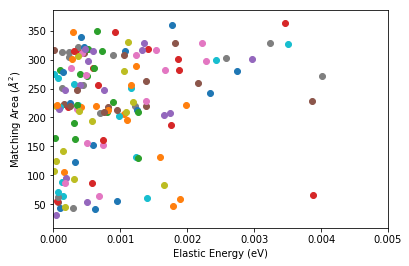

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

for i in all_matches:
    plt.scatter(i['elastic_energy'],i['match_area'])
plt.xlabel("Elastic Energy (eV)")
plt.ylabel(r"Matching Area ($\AA^2$)")
plt.xlim(0,0.005)
plt.show()

Our previous analysis shows that the lower left corner is preferred. So let's look at matches with matching area <

In [12]:

for m in all_matches:
    if m['match_area'] < 50.0 and m['elastic_energy'] < 0.002:
        print("Material: {} Substrate Face: {}  Film Direction: {}  Strain: {}".format(m['composition'],
                                                                                      m['sub_miller'],
                                                                                      m['film_miller'],
                                                                                      m['strain']))


Material: CeO2 Substrate Face: [0, 1, 0]  Film Direction: [1, 0, -1]  Strain: 0.012856399831028797
Material: GaAs Substrate Face: [1, 0, 0]  Film Direction: [1, 0, -1]  Strain: 0.018005629745282737
Material: DyScO3 Substrate Face: [0, 0, 1]  Film Direction: [0, 0, 1]  Strain: 0.006456864634338208
Material: DyScO3 Substrate Face: [0, 1, 0]  Film Direction: [0, 1, 0]  Strain: 0.011114725727691326
Material: DyScO3 Substrate Face: [1, 0, 0]  Film Direction: [1, 0, 0]  Strain: 0.006888529056243525
Material: GaP Substrate Face: [0, 1, 0]  Film Direction: [1, 0, -1]  Strain: 0.010095340220019764
